In [1]:
# Import packages 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime

In [2]:
# Store filepath in a variable
violation = "Red_Light_Camera_Violations.csv"

In [6]:
#!cd Resources/ && unzip Red_Light_Camera_Violations.csv.zip

Archive:  Red_Light_Camera_Violations.csv.zip
  inflating: Red_Light_Camera_Violations.csv  
replace __MACOSX/._Red_Light_Camera_Violations.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: ^C


In [7]:
!open .

In [8]:
violation_df = pd.read_csv("Resources/Red_Light_Camera_Violations.csv", encoding="UTF-8")

In [9]:
violation_df.head()

,INTERSECTION,CAMERA ID,ADDRESS,VIOLATION DATE,VIOLATIONS,X COORDINATE,Y COORDINATE,LATITUDE,LONGITUDE,LOCATION
0,IRVING PARK AND KILPATRICK,2763.0,4700 W IRVING PARK ROA,04/09/2015,4,NaN,NaN,NaN,NaN,NaN
1,VAN BUREN AND WESTERN,2054.0,2400 W VAN BUREN STREE,04/14/2015,5,NaN,NaN,NaN,NaN,NaN
2,115TH AND HALSTED,2552.0,11500 S HALSTED STREE,04/08/2015,5,NaN,NaN,NaN,NaN,NaN
3,IRVING PARK AND KILPATRICK,2764.0,4700 W IRVING PARK ROA,04/19/2015,4,NaN,NaN,NaN,NaN,NaN
4,ELSTON AND IRVING PARK,1503.0,3700 W IRVING PARK ROA,04/23/2015,3,NaN,NaN,NaN,NaN,NaN


In [10]:
violation_df["violation_date_as_date"] = pd.to_datetime(violation_df["VIOLATION DATE"])


In [11]:
# Dates 2020 

jan_start_date = "2020-01-01" 
jan_end_date = "2020-01-31"
feb_start_date = "2020-02-01" 
feb_end_date = "2020-02-29"
mar_start_date = "2020-03-01" 
mar_end_date = "2020-03-31"
apr_start_date = "2020-04-01" 
apr_end_date = "2020-04-30"
may_start_date = "2020-05-01" 
may_end_date = "2020-05-31"
jun_start_date = "2020-06-01" 
jun_end_date = "2020-06-30"
jul_start_date = "2020-07-01" 
jul_end_date = "2020-07-31"
aug_start_date = "2020-08-01" 
aug_end_date = "2020-08-30"
sep_start_date = "2020-09-01" 
sep_end_date = "2020-09-30"
oct_start_date = "2020-10-01" 
oct_end_date = "2020-10-31"
nov_start_date = "2020-11-01" 
nov_end_date = "2020-11-30"
dec_start_date = "2020-12-01" 
dec_end_date = "2020-12-31"
jan21_start_date = "2021-01-01" 
jan21_end_date = "2021-01-31"
feb21_start_date = "2021-02-01" 
feb21_end_date = "2021-02-28"
mar21_start_date = "2021-03-01" 
mar21_end_date = "2021-03-31"

In [12]:
# Month DF

jan_2020_df = violation_df.loc[(violation_df["violation_date_as_date"] > jan_start_date) & (violation_df["violation_date_as_date"] <= jan_end_date)]
feb_2020_df = violation_df.loc[(violation_df["violation_date_as_date"] > feb_start_date) & (violation_df["violation_date_as_date"] <= feb_end_date)]
mar_2020_df = violation_df.loc[(violation_df["violation_date_as_date"] > mar_start_date) & (violation_df["violation_date_as_date"] <= mar_end_date)]
apr_2020_df = violation_df.loc[(violation_df["violation_date_as_date"] > apr_start_date) & (violation_df["violation_date_as_date"] <= apr_end_date)]
may_2020_df = violation_df.loc[(violation_df["violation_date_as_date"] > may_start_date) & (violation_df["violation_date_as_date"] <= may_end_date)]
jun_2020_df = violation_df.loc[(violation_df["violation_date_as_date"] > jun_start_date) & (violation_df["violation_date_as_date"] <= jun_end_date)]
jul_2020_df = violation_df.loc[(violation_df["violation_date_as_date"] > jul_start_date) & (violation_df["violation_date_as_date"] <= jul_end_date)]
aug_2020_df = violation_df.loc[(violation_df["violation_date_as_date"] > aug_start_date) & (violation_df["violation_date_as_date"] <= aug_end_date)]
sep_2020_df = violation_df.loc[(violation_df["violation_date_as_date"] > sep_start_date) & (violation_df["violation_date_as_date"] <= sep_end_date)]
oct_2020_df = violation_df.loc[(violation_df["violation_date_as_date"] > oct_start_date) & (violation_df["violation_date_as_date"] <= oct_end_date)]
nov_2020_df = violation_df.loc[(violation_df["violation_date_as_date"] > nov_start_date) & (violation_df["violation_date_as_date"] <= nov_end_date)]
dec_2020_df = violation_df.loc[(violation_df["violation_date_as_date"] > dec_start_date) & (violation_df["violation_date_as_date"] <= dec_end_date)]
jan_2021_df = violation_df.loc[(violation_df["violation_date_as_date"] > jan21_start_date) & (violation_df["violation_date_as_date"] <= jan21_end_date)]
feb_2021_df = violation_df.loc[(violation_df["violation_date_as_date"] > feb21_start_date) & (violation_df["violation_date_as_date"] <= feb21_end_date)]
mar_2021_df = violation_df.loc[(violation_df["violation_date_as_date"] > mar21_start_date) & (violation_df["violation_date_as_date"] <= mar21_end_date)]


In [13]:
# Violations 
#feb_2020_df.head()
mar_2020_df.head()

,INTERSECTION,CAMERA ID,ADDRESS,VIOLATION DATE,VIOLATIONS,X COORDINATE,Y COORDINATE,LATITUDE,LONGITUDE,LOCATION,violation_date_as_date
2424,ASHLAND AND IRVING PARK,1153.0,1600 W IRVING PARK ROA,03/12/2020,2,NaN,NaN,NaN,NaN,NaN,2020-03-12
5147,IRVING PARK AND CALIFORNIA,1234.0,2800 W IRVING PARK ROA,03/12/2020,2,NaN,NaN,NaN,NaN,NaN,2020-03-12
5740,99TH AND HALSTED,2431.0,9900 S HALSTED ST,03/12/2020,17,1.172690e+06,1.839172e+06,41.714119,-87.643145,"(41.714118868089905, -87.64314540818165)",2020-03-12
5741,LAWRENCE AND CICERO,1041.0,4800 N CICERO AVE,03/12/2020,8,1.143465e+06,1.931491e+06,41.968048,-87.747876,"(41.968048007293845, -87.74787598468126)",2020-03-12
5743,PULASKI AND ARMITAGE,1844.0,4000 W ARMITAGE AVENUE,03/12/2020,4,1.149375e+06,1.913029e+06,41.917275,-87.726623,"(41.91727506940875, -87.72662274644799)",2020-03-12


In [14]:
jan_2020_df["VIOLATIONS"].sum()

33020

In [15]:
feb_2020_df["VIOLATIONS"].sum()

34524

In [16]:
mar_2020_df["VIOLATIONS"].sum()

34683

In [17]:
apr_2020_df["VIOLATIONS"].sum()

34303

In [18]:
may_2020_df["VIOLATIONS"].sum()

43889

In [19]:
jun_2020_df["VIOLATIONS"].sum()

57156

In [20]:
jul_2020_df["VIOLATIONS"].sum()

56623

In [21]:
aug_2020_df["VIOLATIONS"].sum()

55693

In [22]:
sep_2020_df["VIOLATIONS"].sum()

54153

In [23]:
oct_2020_df["VIOLATIONS"].sum()

51862

In [24]:
nov_2020_df["VIOLATIONS"].sum()

42961

In [25]:
dec_2020_df["VIOLATIONS"].sum()

40855

In [26]:
jan_2021_df["VIOLATIONS"].sum()

35456

In [27]:
feb_2021_df["VIOLATIONS"].sum()

33114

In [28]:
mar_2021_df["VIOLATIONS"].sum()

18162

In [30]:
# Yearly Summary Graph

Months_in_2020 = ["January", "February", "March", "April", "May", "June",
                "July","August", "September", "October", "November", "December"]
number_red_violations = [33020, 34524, 34683, 34303, 43889, 57156, 56623, 55693, 54153, 51862, 42961, 40855]
x_axis = np.arange(len(number_red_violations))
x_axis = Months_in_2020

<BarContainer object of 12 artists>

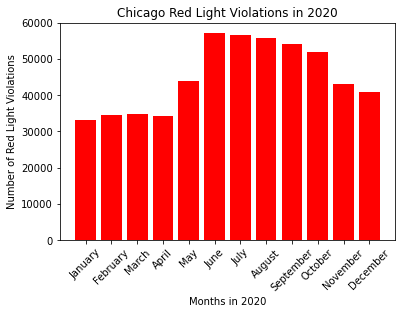

In [31]:
#bar plot generation
plt.xticks(rotation = 45)
plt.title("Chicago Red Light Violations in 2020")
plt.xlabel("Months in 2020")
plt.ylabel("Number of Red Light Violations")
plt.bar(x_axis, number_red_violations, color="r", align="center")

In [32]:
# Dates 2019 

jan_start_date_19 = "2019-01-01" 
jan_end_date_19 = "2019-01-31"
feb_start_date_19 = "2019-02-01" 
feb_end_date_19 = "2019-02-28"
mar_start_date_19 = "2019-03-01" 
mar_end_date_19 = "2019-03-31"
apr_start_date_19 = "2019-04-01" 
apr_end_date_19 = "2019-04-30"
may_start_date_19 = "2019-05-01" 
may_end_date_19 = "2019-05-31"
jun_start_date_19 = "2019-06-01" 
jun_end_date_19 = "2019-06-30"
jul_start_date_19 = "2019-07-01" 
jul_end_date_19 = "2019-07-31"
aug_start_date_19 = "2019-08-01" 
aug_end_date_19 = "2019-08-30"
sep_start_date_19 = "2019-09-01" 
sep_end_date_19 = "2019-09-30"
oct_start_date_19 = "2019-10-01" 
oct_end_date_19 = "2019-10-31"
nov_start_date_19 = "2019-11-01" 
nov_end_date_19 = "2019-11-30"
dec_start_date_19 = "2019-12-01" 
dec_end_date_19 = "2019-12-31"

In [33]:
# Month DF

jan_2019_df = violation_df.loc[(violation_df["violation_date_as_date"] > jan_start_date_19) & (violation_df["violation_date_as_date"] <= jan_end_date_19)]
feb_2019_df = violation_df.loc[(violation_df["violation_date_as_date"] > feb_start_date_19) & (violation_df["violation_date_as_date"] <= feb_end_date_19)]
mar_2019_df = violation_df.loc[(violation_df["violation_date_as_date"] > mar_start_date_19) & (violation_df["violation_date_as_date"] <= mar_end_date_19)]
apr_2019_df = violation_df.loc[(violation_df["violation_date_as_date"] > apr_start_date_19) & (violation_df["violation_date_as_date"] <= apr_end_date_19)]
may_2019_df = violation_df.loc[(violation_df["violation_date_as_date"] > may_start_date_19) & (violation_df["violation_date_as_date"] <= may_end_date_19)]
jun_2019_df = violation_df.loc[(violation_df["violation_date_as_date"] > jun_start_date_19) & (violation_df["violation_date_as_date"] <= jun_end_date_19)]
jul_2019_df = violation_df.loc[(violation_df["violation_date_as_date"] > jul_start_date_19) & (violation_df["violation_date_as_date"] <= jul_end_date_19)]
aug_2019_df = violation_df.loc[(violation_df["violation_date_as_date"] > aug_start_date_19) & (violation_df["violation_date_as_date"] <= aug_end_date_19)]
sep_2019_df = violation_df.loc[(violation_df["violation_date_as_date"] > sep_start_date_19) & (violation_df["violation_date_as_date"] <= sep_end_date_19)]
oct_2019_df = violation_df.loc[(violation_df["violation_date_as_date"] > oct_start_date_19) & (violation_df["violation_date_as_date"] <= oct_end_date_19)]
nov_2019_df = violation_df.loc[(violation_df["violation_date_as_date"] > nov_start_date_19) & (violation_df["violation_date_as_date"] <= nov_end_date_19)]
dec_2019_df = violation_df.loc[(violation_df["violation_date_as_date"] > dec_start_date_19) & (violation_df["violation_date_as_date"] <= dec_end_date_19)]


In [35]:
jan_2019_df["VIOLATIONS"].sum()


29674

In [36]:
feb_2019_df["VIOLATIONS"].sum()

31270

In [37]:
mar_2019_df["VIOLATIONS"].sum()

41447

In [38]:
apr_2019_df["VIOLATIONS"].sum()

41407

In [39]:
may_2019_df["VIOLATIONS"].sum()

48732

In [40]:
jun_2019_df["VIOLATIONS"].sum()

51678

In [41]:
jul_2019_df["VIOLATIONS"].sum()

51662

In [42]:
aug_2019_df["VIOLATIONS"].sum()

49453

In [43]:
sep_2019_df["VIOLATIONS"].sum()

45386

In [44]:
oct_2019_df["VIOLATIONS"].sum()

43323

In [45]:
nov_2019_df["VIOLATIONS"].sum()

37792

In [46]:
dec_2019_df["VIOLATIONS"].sum()

38725

In [47]:
# Yearly Summary Graph

Months_in_2019 = ["January", "February", "March", "April", "May", "June",
                "July","August", "September", "October", "November", "December"]
number_red_violations = [29674, 31270, 41447, 41407, 48732, 51678, 51662, 49453, 45386, 43323, 37792, 38725]
x_axis = np.arange(len(number_red_violations))
x_axis = Months_in_2019

<BarContainer object of 12 artists>

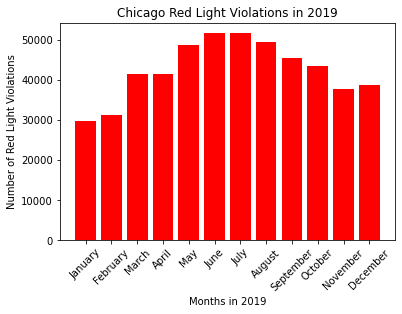

In [48]:
#bar plot generation
plt.xticks(rotation = 45)
plt.title("Chicago Red Light Violations in 2019")
plt.xlabel("Months in 2019")
plt.ylabel("Number of Red Light Violations")
plt.bar(x_axis, number_red_violations, color="r", align="center")